## Load and Explore the Dataset


In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("advertising.csv")

# Display the first 5 rows of the dataset
df.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


## Data Analysis and Summary


In [2]:
# Display basic information about the dataset
df.info()

# Display summary statistics of the dataset
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


## Data Cleaning and Handling Missing Values


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

# Drop duplicate rows if any
df = df.drop_duplicates()

# Verify if duplicates were removed
print("Dataset Shape After Removing Duplicates:", df.shape)

Missing Values in Each Column:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64
Dataset Shape After Removing Duplicates: (200, 4)


## Data Visualization


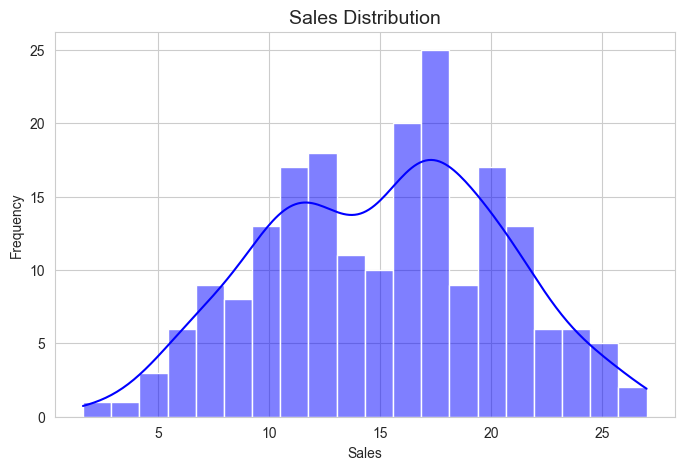

In [4]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set_style("whitegrid")

# Plot the distribution of sales
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=20, kde=True, color='blue')
plt.title("Sales Distribution", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


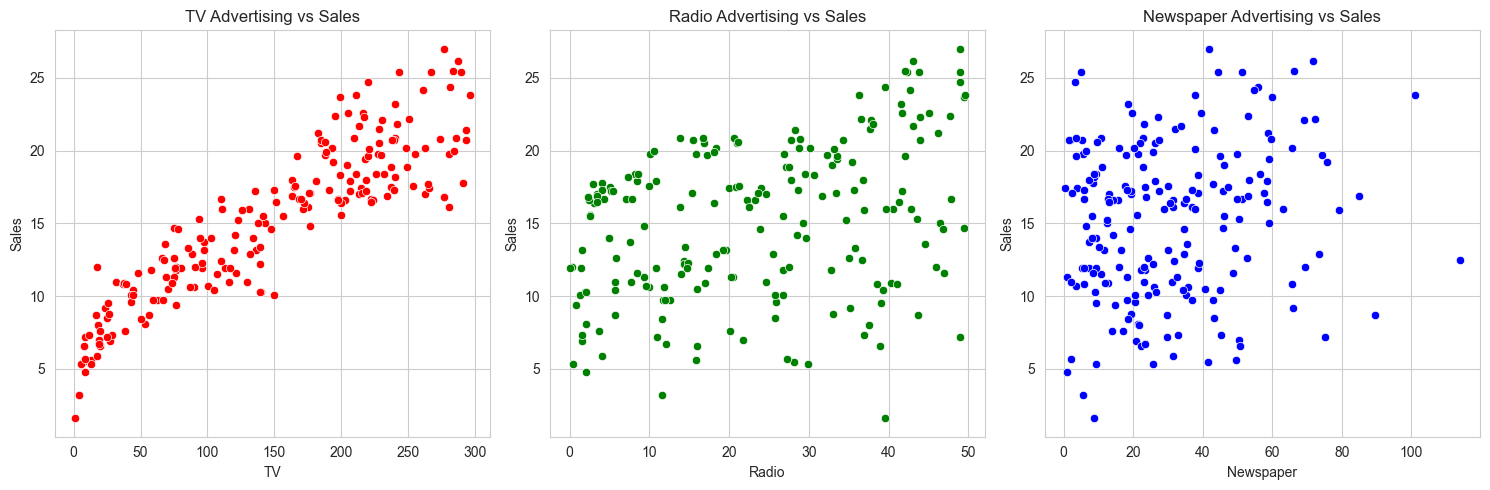

In [5]:
# Scatter plots to check correlation
plt.figure(figsize=(15,5))

# TV vs Sales
plt.subplot(1,3,1)
sns.scatterplot(x=df['TV'], y=df['Sales'], color='red')
plt.title("TV Advertising vs Sales")

# Radio vs Sales
plt.subplot(1,3,2)
sns.scatterplot(x=df['Radio'], y=df['Sales'], color='green')
plt.title("Radio Advertising vs Sales")

# Newspaper vs Sales
plt.subplot(1,3,3)
sns.scatterplot(x=df['Newspaper'], y=df['Sales'], color='blue')
plt.title("Newspaper Advertising vs Sales")

plt.tight_layout()
plt.show()


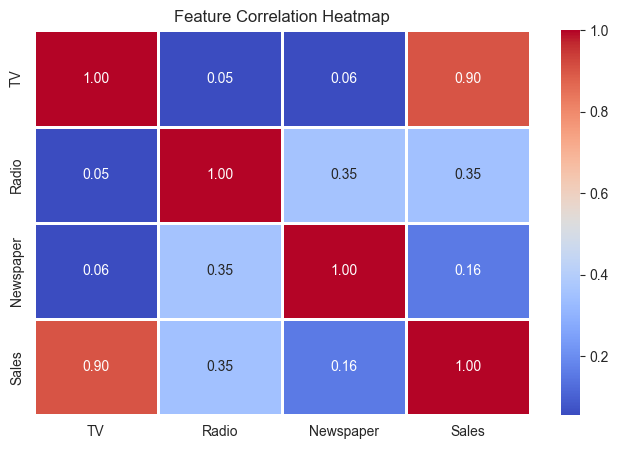

In [7]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=2)
plt.title("Feature Correlation Heatmap")
plt.show()



## Data Preprocessing and Splitting


In [8]:
# Import necessary libraries
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (160, 3)
Testing Set Shape: (40, 3)


## Building and Training the Sales Prediction Model


In [9]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression

# Create an instance of the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [0.05450927 0.10094536 0.00433665]
Model Intercept: 4.714126402214127


## Model Evaluation


In [10]:
# Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)


Mean Absolute Error (MAE): 1.2748262109549338
Mean Squared Error (MSE): 2.9077569102710896
R-squared Score (R²): 0.9059011844150826


## Saving the Model and Making New Predictions


In [12]:
# Import necessary libraries
import joblib
import pandas as pd

# Save the trained model
joblib.dump(model, "sales_prediction_model.pkl")

# Load the saved model
loaded_model = joblib.load("sales_prediction_model.pkl")

# Create a DataFrame for the new input
new_data = pd.DataFrame([[200, 30, 20]], columns=['TV', 'Radio', 'Newspaper'])

# Make the prediction
predicted_sales = loaded_model.predict(new_data)

print("Predicted Sales for the given input:", predicted_sales[0])


Predicted Sales for the given input: 18.73107437788744
